Ingrese la fecha de la simulación (YYYY-MM-DD):  2024-08-04
Ingrese la hora de inicio de la simulación (HH:MM:SS):  11:24:00
Ingrese la duración de la simulación en horas:  2
Ingrese el intervalo de la simulación en minutos:  30


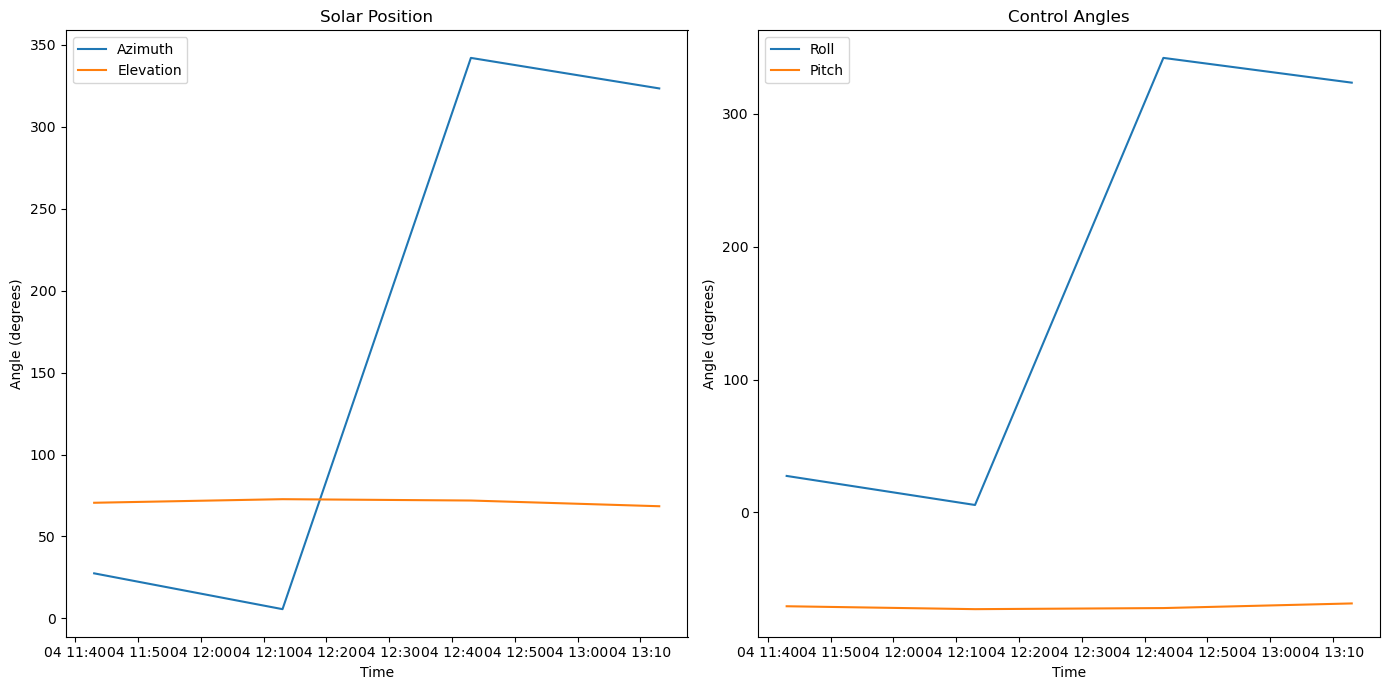

In [9]:
from pysolar.solar import get_altitude, get_azimuth
from datetime import datetime, timedelta
from pytz import timezone
import matplotlib.pyplot as plt
import numpy as np

def getSolarPosition(latitude: float = -0.2105367, longitude: float = -78.491614, date: datetime = datetime.now(tz=timezone("America/Guayaquil"))):
    """Calcula el azimuth y la elevation para una posición geográfica (por defecto la EPN) y la fecha date."""
    az = get_azimuth(latitude, longitude, date)
    el = get_altitude(latitude, longitude, date)
    return az, el

def calculate_control_angles(azimuth, elevation):
    """Calcula los ángulos de control (pitch y roll) para un seguidor solar."""
    roll = azimuth
    pitch = -elevation
    return roll, pitch

def simulate_solar_tracker(date, duration_hours=24, interval_minutes=10):
    times = [date + timedelta(minutes=i) for i in range(0, duration_hours*60, interval_minutes)]
    azimuths = []
    elevations = []
    rolls = []
    pitchs = []

    for time in times:
        az, el = getSolarPosition(date=time)
        azimuths.append(az)
        elevations.append(el)
        roll, pitch = calculate_control_angles(az, el)
        rolls.append(roll)
        pitchs.append(pitch)
    
    # Graficar trayectoria solar
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(times, azimuths, label='Azimuth')
    plt.plot(times, elevations, label='Elevation')
    plt.xlabel('Time')
    plt.ylabel('Angle (degrees)')
    plt.title('Solar Position')
    plt.legend()

    # Graficar ángulos de control
    plt.subplot(1, 2, 2)
    plt.plot(times, rolls, label='Roll')
    plt.plot(times, pitchs, label='Pitch')
    plt.xlabel('Time')
    plt.ylabel('Angle (degrees)')
    plt.title('Control Angles')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Ingresar fecha y duración de la simulación
    date_str = input("Ingrese la fecha de la simulación (YYYY-MM-DD): ")
    time_str = input("Ingrese la hora de inicio de la simulación (HH:MM:SS): ")
    date_time_str = f"{date_str} {time_str}"
    date = datetime.strptime(date_time_str, "%Y-%m-%d %H:%M:%S")
    date = date.replace(tzinfo=timezone("America/Guayaquil"))
    
    duration_hours = int(input("Ingrese la duración de la simulación en horas: "))
    interval_minutes = int(input("Ingrese el intervalo de la simulación en minutos: "))
    
    # Realizar simulación
    simulate_solar_tracker(date, duration_hours, interval_minutes)

if __name__ == "__main__":
    main()
